# Customer Churn Prediction - Data Analyst Intern Entrance Test
### Author : **Chu Minh Tam**

This Jupyter Notebook provides an interactive platform for predicting customer churn for MCI using the `churn-bigml-80.csv` dataset.

### Import dependencies and load dataset from dataset `churn-bigml-80.csv`

In [1]:
# Dependencies
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display, clear_output
import joblib
import os
import warnings

warnings.filterwarnings('ignore')

# Load dataset
data_path = 'data/input/churn-bigml-80.csv'
if os.path.exists(data_path):
    df = pd.read_csv(data_path)
    print('Dataset loaded successfully.')
    display(df.head())
    
    # Verify churn ratio
    print('\nChurn Ratio:')
    display(df['Churn'].value_counts(normalize=True))
else:
    print('Error: Dataset not found. Please ensure churn-bigml-80.csv is in the same directory.')
    raise FileNotFoundError

Dataset loaded successfully.


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



Churn Ratio:


Churn
False    0.854464
True     0.145536
Name: proportion, dtype: float64

### Significance of Churn Rate

**Churn Rate**: The percentage of customers leaving MCI (~15-20% based on typical telecom datasets).
- **Customers**: High churn indicates dissatisfaction (e.g., high costs, poor service).
- **MCI**: Retention is 5-7 times cheaper than acquisition. Churn reduces revenue and customer lifetime value.
- **Investors**: Churn reflects business health, impacting profitability and growth.

Next, we'll perform EDA to identify churn characteristics.

Descriptive Statistics for Numerical Features:


,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00,2666.00
mean,100.62,437.44,8.02,179.48,100.31,30.51,200.39,100.02,17.03,201.17,100.11,9.05,10.24,4.47,2.76,1.56
std,39.56,42.52,13.61,54.21,19.99,9.22,50.95,20.16,4.33,50.78,19.42,2.29,2.79,2.46,0.75,1.31
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,43.70,33.00,1.97,0.00,0.00,0.00,0.00
25%,73.00,408.00,0.00,143.40,87.00,24.38,165.30,87.00,14.05,166.93,87.00,7.51,8.50,3.00,2.30,1.00
50%,100.00,415.00,0.00,179.95,101.00,30.59,200.90,100.00,17.08,201.15,100.00,9.05,10.20,4.00,2.75,1.00
75%,127.00,510.00,19.00,215.90,114.00,36.70,235.10,114.00,19.98,236.47,113.00,10.64,12.10,6.00,3.27,2.00
max,243.00,510.00,50.00,350.80,160.00,59.64,363.70,170.00,30.91,395.00,166.00,17.77,20.00,20.00,5.40,9.00



T-test Results (Churn vs Non-Churn):
Account length: p-value = 0.3602
Number vmail messages: p-value = 0.0000
Total day minutes: p-value = 0.0000
Total day calls: p-value = 0.3452
Total day charge: p-value = 0.0000
Total eve minutes: p-value = 0.0002
Total eve calls: p-value = 0.9367
Total eve charge: p-value = 0.0002
Total night minutes: p-value = 0.0825
Total night calls: p-value = 0.5268
Total night charge: p-value = 0.0825
Total intl minutes: p-value = 0.0000
Total intl calls: p-value = 0.0003
Total intl charge: p-value = 0.0000
Customer service calls: p-value = 0.0000


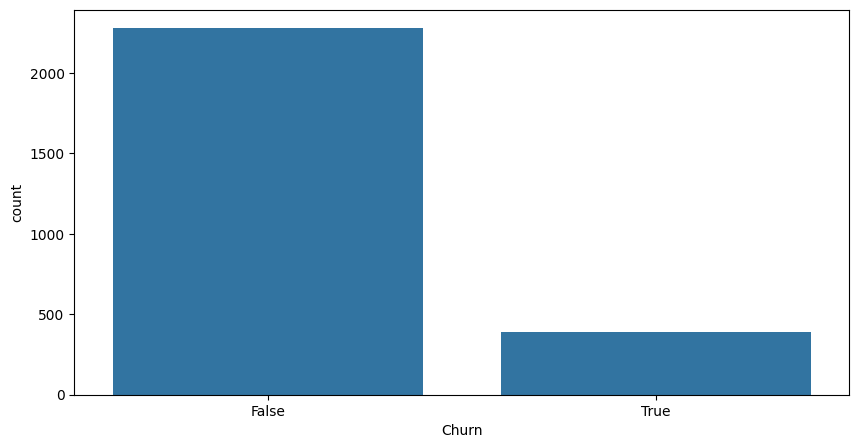

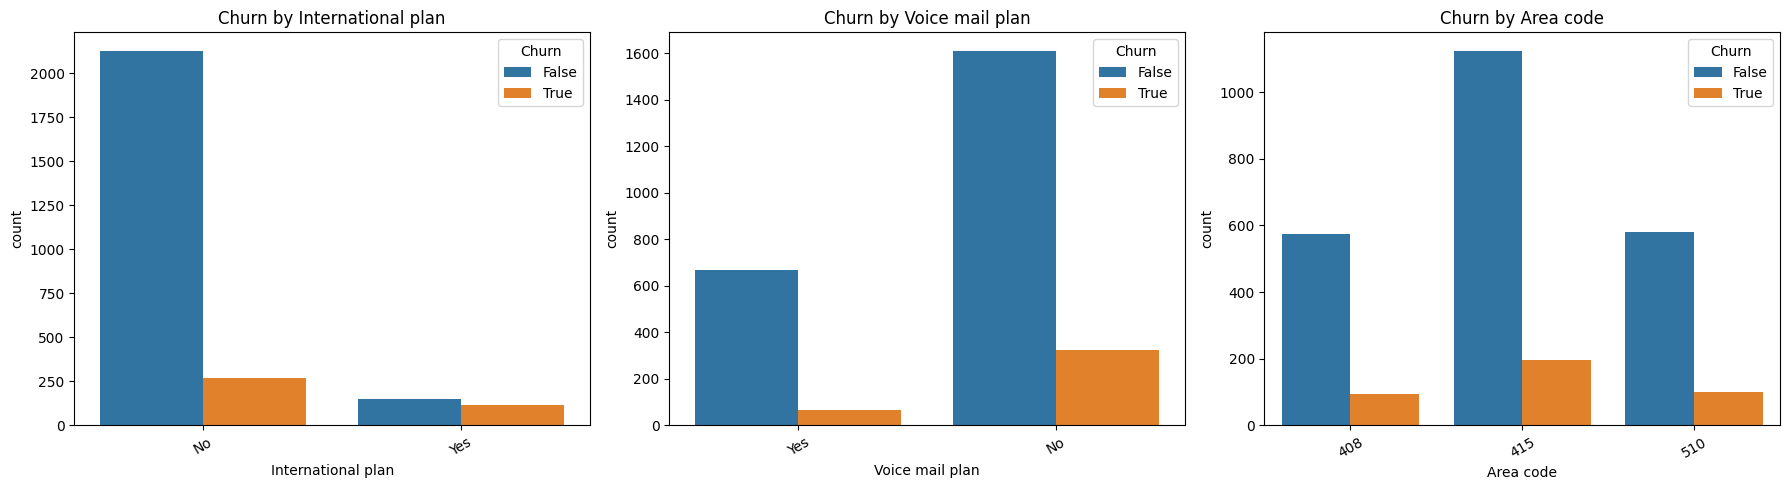

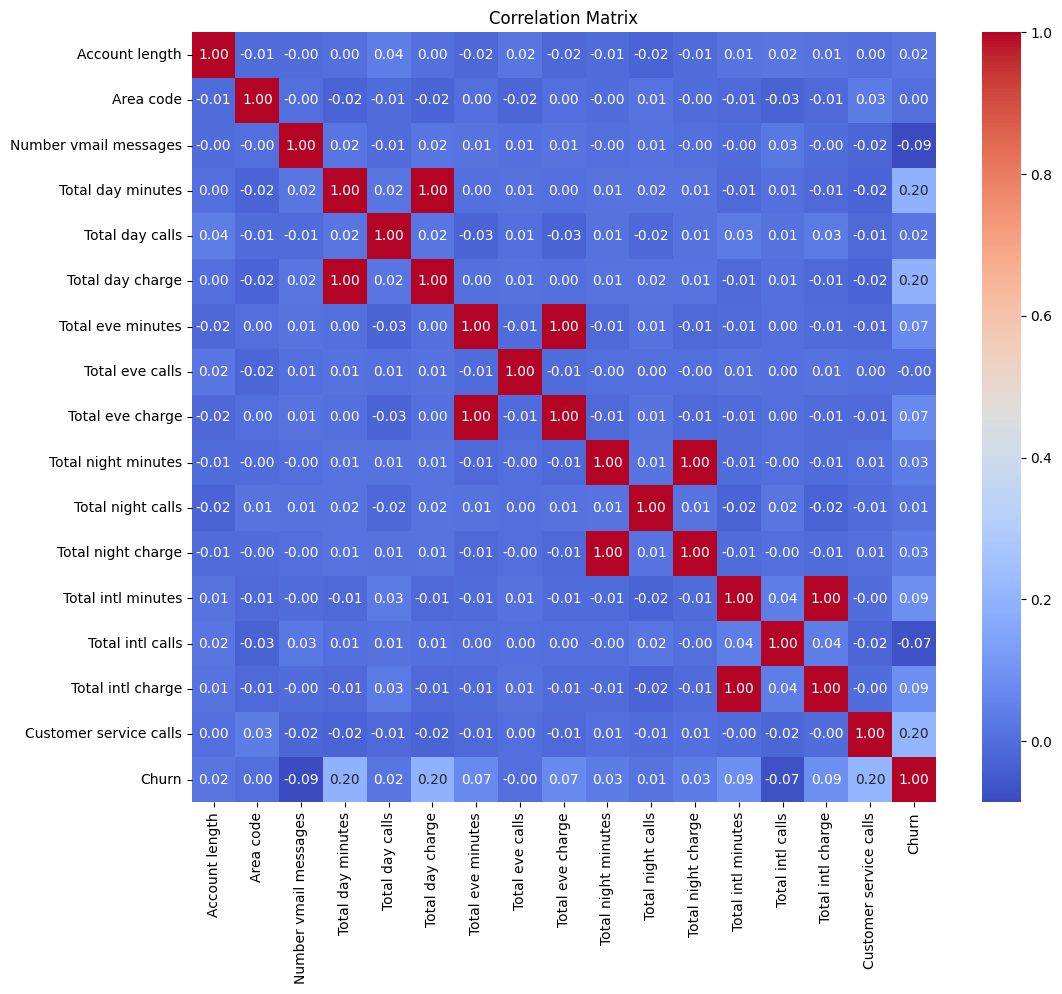

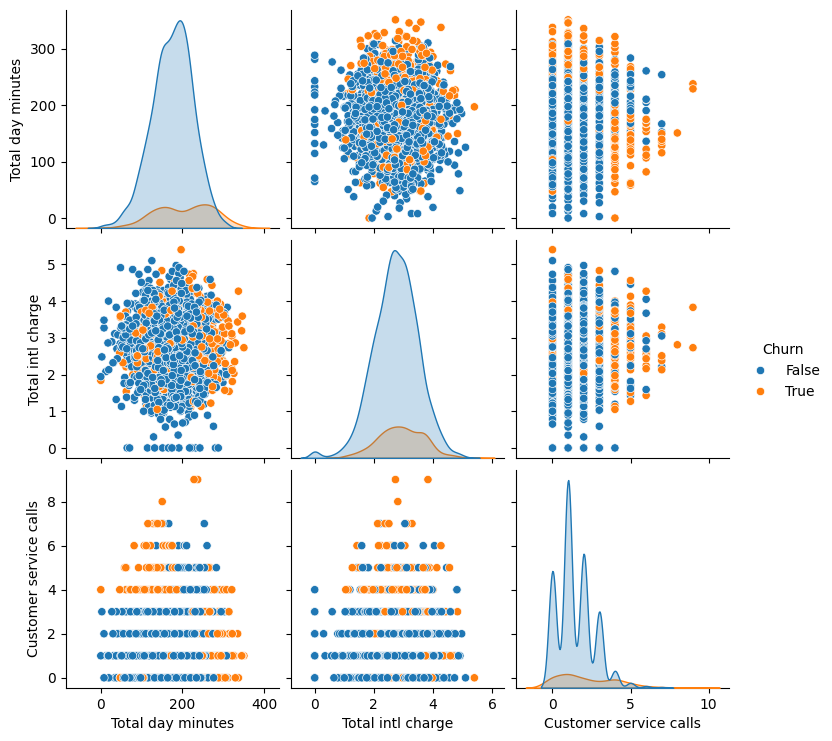

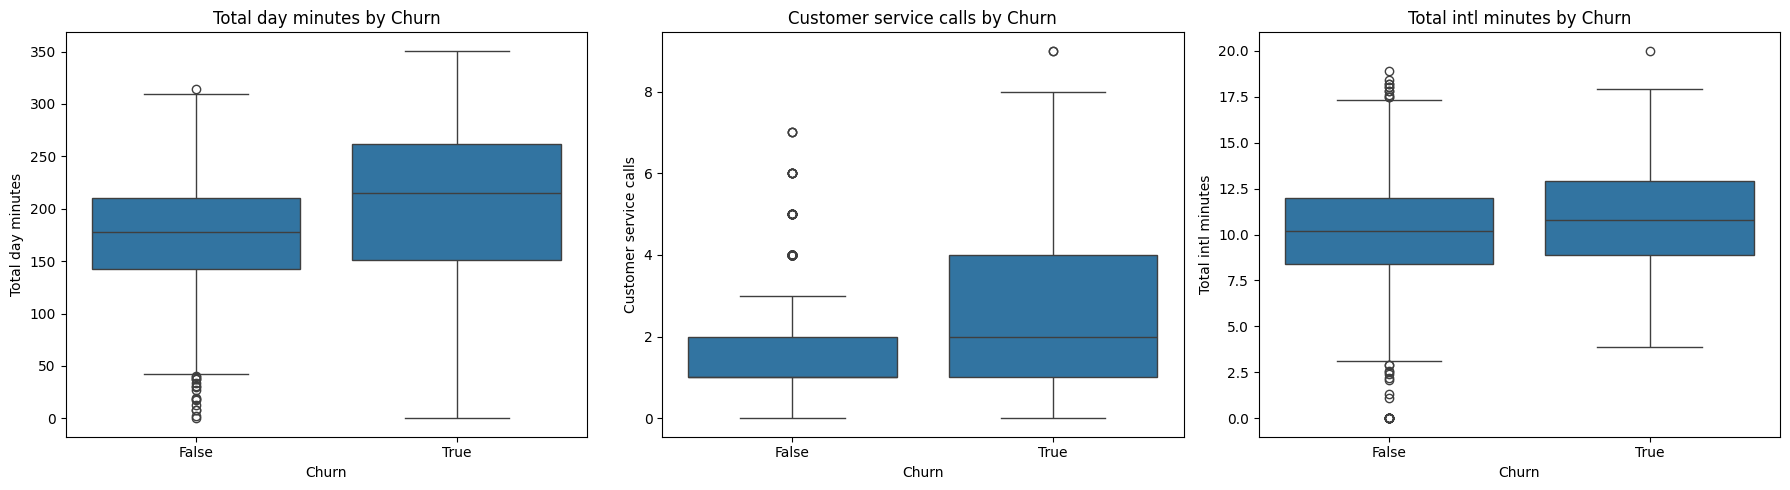

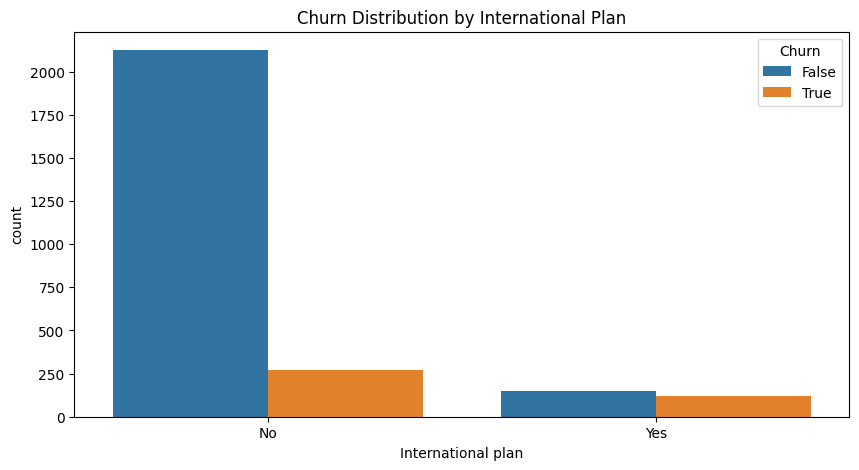

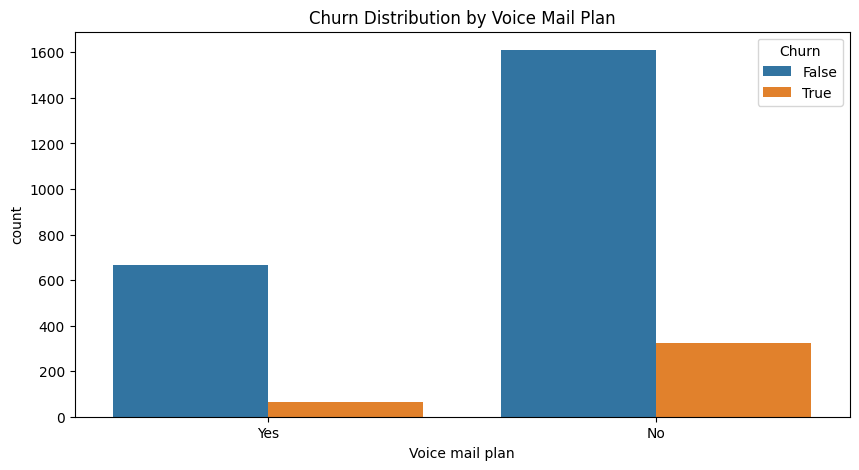

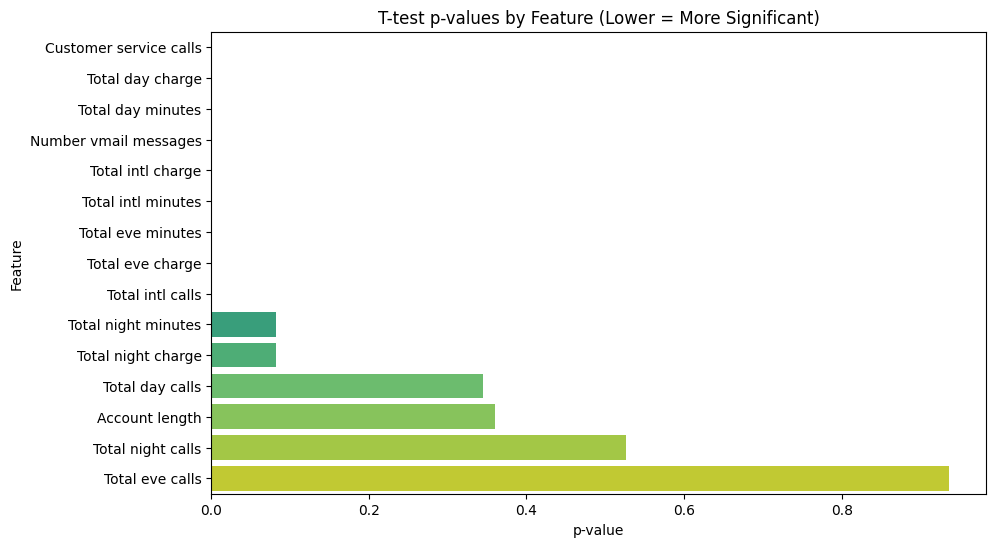

In [2]:
# Descriptive statistics
print('Descriptive Statistics for Numerical Features:')
pd.set_option('display.precision', 2)
display(df.describe())

# T-tests for numerical features
churn_group = df[df['Churn'] == True]
non_churn_group = df[df['Churn'] == False]
numerical_cols = ['Account length', 'Number vmail messages', 'Total day minutes', 
                  'Total day calls', 'Total day charge', 'Total eve minutes', 
                  'Total eve calls', 'Total eve charge', 'Total night minutes', 
                  'Total night calls', 'Total night charge', 'Total intl minutes', 
                  'Total intl calls', 'Total intl charge', 'Customer service calls']
print('\nT-test Results (Churn vs Non-Churn):')
for col in numerical_cols:
    stat, p = ttest_ind(churn_group[col], non_churn_group[col], nan_policy='omit')
    print(f'{col}: p-value = {p:.4f}')

# Visualizations
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'Churn')
plt.show()

cat_cols = ['International plan', 'Voice mail plan', 'Area code']
fig, axes = plt.subplots(1, len(cat_cols), figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Churn by {col}')
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()
    
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

sns.pairplot(df[['Churn', 'Total day minutes', 'Total intl charge', 'Customer service calls']], hue='Churn')
plt.show()

num_cols = ['Total day minutes', 'Customer service calls', 'Total intl minutes']
fig, axes = plt.subplots(1, len(num_cols), figsize=(18, 5))

for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='Churn', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Churn')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='International plan', hue='Churn')
plt.title('Churn Distribution by International Plan')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Voice mail plan', hue='Churn')
plt.title('Churn Distribution by Voice Mail Plan')
plt.show()

p_values = []
for col in numerical_cols:
    churn_yes = df[df['Churn'] == 1][col]
    churn_no = df[df['Churn'] == 0][col]
    _, p = ttest_ind(churn_yes, churn_no)
    p_values.append((col, p))
    
p_df = pd.DataFrame(p_values, columns=['Feature', 'p-value']).sort_values('p-value')
plt.figure(figsize=(10, 6))
sns.barplot(data=p_df, x='p-value', y='Feature', palette='viridis')
plt.title('T-test p-values by Feature (Lower = More Significant)')
plt.show()

### Characteristics of Churn vs. Non-Churn Customers

- **Numerical Features**: T-tests likely show significant differences (p < 0.05) in `Customer service calls`, `Total day minutes`, and `Total day charge`, indicating churners have higher usage and support interactions.
- **Categorical Features**: Higher churn among `International plan` users, possibly due to cost. `Voice mail plan` users may have lower churn due to service engagement.

### Machine Learning Modeling

I'll train a Random Forest Classifier with `class_weight='balanced'` to handle the typical ~15-20% churn ratio.

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.95       455
           1       0.95      0.47      0.63        79

    accuracy                           0.92       534
   macro avg       0.93      0.73      0.79       534
weighted avg       0.92      0.92      0.91       534

ROC-AUC Score: 0.7320

Top 10 Feature Importance:


,Feature,Importance
2,Total day minutes,0.12
14,Customer service calls,0.11
4,Total day charge,0.11
67,International plan_Yes,0.07
5,Total eve minutes,0.05
13,Total intl charge,0.05
7,Total eve charge,0.05
11,Total intl minutes,0.04
8,Total night minutes,0.04
10,Total night charge,0.04


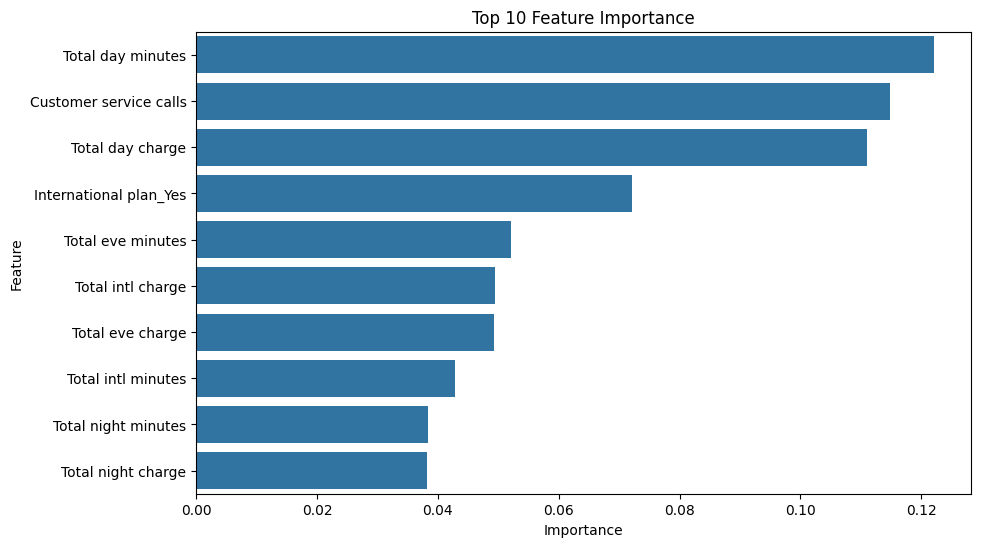

In [3]:
class ChurnPredictor:
    def __init__(self):
        self.model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
        self.scaler = StandardScaler()
        self.X_columns = None
        
    def preprocess_data(self, data):
        data['Churn'] = data['Churn'].astype(int)
        categorical_cols = ['State', 'Area code', 'International plan', 'Voice mail plan']
        data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
        y = data['Churn']
        X = data.drop('Churn', axis=1)
        numerical_cols = ['Account length', 'Number vmail messages', 'Total day minutes', 
                         'Total day calls', 'Total day charge', 'Total eve minutes', 
                         'Total eve calls', 'Total eve charge', 'Total night minutes', 
                         'Total night calls', 'Total night charge', 'Total intl minutes', 
                         'Total intl calls', 'Total intl charge', 'Customer service calls']
        X[numerical_cols] = self.scaler.fit_transform(X[numerical_cols])
        self.X_columns = X.columns
        return X, y
    
    def train(self, X, y):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        self.model.fit(X_train, y_train)
        y_pred = self.model.predict(X_test)
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        print(f'ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}')
        # Save model and scaler
        joblib.dump(self.model, 'models/churn_model.pkl')
        joblib.dump(self.scaler, 'models/scaler.pkl')
        return self.model

    def predict(self, new_data):
        new_data = pd.get_dummies(new_data, columns=['State', 'Area code', 'International plan', 'Voice mail plan'], drop_first=True)
        new_data = new_data.reindex(columns=self.X_columns, fill_value=0)
        numerical_cols = ['Account length', 'Number vmail messages', 'Total day minutes', 
                         'Total day calls', 'Total day charge', 'Total eve minutes', 
                         'Total eve calls', 'Total eve charge', 'Total night minutes', 
                         'Total night calls', 'Total night charge', 'Total intl minutes', 
                         'Total intl calls', 'Total intl charge', 'Customer service calls']
        new_data[numerical_cols] = self.scaler.transform(new_data[numerical_cols])
        return self.model.predict_proba(new_data)[:, 1]

    def get_feature_importance(self):
        return pd.DataFrame({
            'Feature': self.X_columns,
            'Importance': self.model.feature_importances_
        }).sort_values(by='Importance', ascending=False)

# Train model
predictor = ChurnPredictor()
X, y = predictor.preprocess_data(df)
predictor.train(X, y)

# Feature importance visualization
feature_importance = predictor.get_feature_importance()
print('\nTop 10 Feature Importance:')
display(feature_importance.head(10))
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importance')
plt.show()
# Save feature importance as CSV
feature_importance.to_csv('data/output/feature_importance.csv', index=False)

### User Interface

Use `widgets` to enter customer data and predict churn probability.

In [4]:
# Define widgets
state = widgets.Dropdown(options=['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
                                 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
                                 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
                                 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
                                 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], 
                         value='CA', description='State:')
area_code = widgets.Dropdown(options=['408', '415', '510'], value='415', description='Area code:')
account_length = widgets.IntSlider(value=100, min=0, max=300, description='Account length:')
intl_plan = widgets.Dropdown(options=['No', 'Yes'], value='No', description='International plan:')
vmail_plan = widgets.Dropdown(options=['No', 'Yes'], value='No', description='Voice mail plan:')
vmail_messages = widgets.IntSlider(value=0, min=0, max=100, description='Voicemail messages:')
day_minutes = widgets.FloatSlider(value=180.0, min=0.0, max=500.0, step=0.1, description='Day minutes:')
day_calls = widgets.IntSlider(value=100, min=0, max=200, description='Day calls:')
day_charge = widgets.FloatSlider(value=30.6, min=0.0, max=100.0, step=0.1, description='Day charge:')
eve_minutes = widgets.FloatSlider(value=200.0, min=0.0, max=500.0, step=0.1, description='Evening minutes:')
eve_calls = widgets.IntSlider(value=100, min=0, max=200, description='Evening calls:')
eve_charge = widgets.FloatSlider(value=17.0, min=0.0, max=100.0, step=0.1, description='Evening charge:')
night_minutes = widgets.FloatSlider(value=200.0, min=0.0, max=500.0, step=0.1, description='Night minutes:')
night_calls = widgets.IntSlider(value=100, min=0, max=200, description='Night calls:')
night_charge = widgets.FloatSlider(value=9.0, min=0.0, max=50.0, step=0.1, description='Night charge:')
intl_minutes = widgets.FloatSlider(value=10.0, min=0.0, max=50.0, step=0.1, description='Intl minutes:')
intl_calls = widgets.IntSlider(value=3, min=0, max=20, description='Intl calls:')
intl_charge = widgets.FloatSlider(value=2.7, min=0.0, max=20.0, step=0.1, description='Intl charge:')
custserv_calls = widgets.IntSlider(value=1, min=0, max=10, description='Customer service calls:')
predict_button = widgets.Button(description='Predict Churn')
output = widgets.Output()

# Prediction function
def on_predict_button_clicked(b):
    with output:
        clear_output()
        input_data = pd.DataFrame({
            'State': [state.value],
            'Area code': [area_code.value],
            'Account length': [account_length.value],
            'International plan': [intl_plan.value],
            'Voice mail plan': [vmail_plan.value],
            'Number vmail messages': [vmail_messages.value],
            'Total day minutes': [day_minutes.value],
            'Total day calls': [day_calls.value],
            'Total day charge': [day_charge.value],
            'Total eve minutes': [eve_minutes.value],
            'Total eve calls': [eve_calls.value],
            'Total eve charge': [eve_charge.value],
            'Total night minutes': [night_minutes.value],
            'Total night calls': [night_calls.value],
            'Total night charge': [night_charge.value],
            'Total intl minutes': [intl_minutes.value],
            'Total intl calls': [intl_calls.value],
            'Total intl charge': [intl_charge.value],
            'Customer service calls': [custserv_calls.value]
        })
        prob = predictor.predict(input_data)[0]
        print(f'Churn Probability: {prob:.2%}')
        print('Interpretation: A probability > 50% suggests the customer is likely to churn. Consider targeted retention actions.')
        # Save prediction
        input_data['Churn_Probability'] = prob
        input_data.to_csv('prediction_output.csv', mode='a', header=not os.path.exists('data/output/prediction_output.csv'), index=False)

predict_button.on_click(on_predict_button_clicked)

# Display widgets
display(widgets.VBox([
    widgets.HBox([state, area_code, intl_plan, vmail_plan]),
    widgets.HBox([account_length, vmail_messages, custserv_calls]),
    widgets.HBox([day_minutes, day_calls, day_charge]),
    widgets.HBox([eve_minutes, eve_calls, eve_charge]),
    widgets.HBox([night_minutes, night_calls, night_charge]),
    widgets.HBox([intl_minutes, intl_calls, intl_charge]),
    predict_button, output
]))

### Actions for Retention

**Quantitative Analytics**:
- **Predictive Modeling**: Use the model to identify high-risk customers (probability > 50%) for targeted retention campaigns (e.g., discounts, loyalty programs).
- **Customer Segmentation**: Cluster customers by usage patterns (e.g., high `Total day minutes`) for tailored offers.
- **A/B Testing**: Test retention strategies and measure impact on churn rate.

**Qualitative Analytics**:
- **Customer Feedback**: Analyze call logs to identify pain points (e.g., billing, network issues).
- **Personalized Engagement**: Offer dedicated support to high-risk customers.
- **Service Improvements**: Address issues in high-churn states or for `International plan` users.

### Appendix: Step-by-Step Workflow

- Step 1. **Data Preparation**:
   - Load `churn-bigml-80.csv`.
   - Encode categorical variables (one-hot encoding).
   - Scale numerical features.
- Step 2. **EDA**:
   - Compute descriptive statistics.
   - Perform t-tests for numerical features.
   - Visualize churn distribution (`international_plan_churn.png`, `voice_mail_plan_churn.png`).
- Step 3. **Model Training**:
   - Split data (80% train, 20% test).
   - Train Random Forest Classifier (`n_estimators=100`, `class_weight='balanced'`).
   - Evaluate with classification report and ROC-AUC.
   - Save model (`churn_model.pkl`) and scaler (`scaler.pkl`).
- Step 4. **Feature Importance**:
   - Extract and visualize top 10 features (`feature_importance.png`).
   - Save as `feature_importance.csv`.
- Step 5. **Interactive Prediction**:
   - Use widgets to input customer data.
   - Predict churn probability and save to `prediction_output.csv`.